# Analyzing Socioeconomic Indicators to Predict GDP of Nations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Data Preprocessing

### 1.*Load the Dataset*:
Import the necessary libraries and load the dataset into a DataFrame.

### 2.*Check for Missing Value*:
Identify any missing values in the dataset and calculate the percentage of missing data for each column.

### 3.*Check for Duplicates*:
Determine if there are any duplicate rows in the dataset and remove them if found.


In [3]:
df = pd.read_csv("world_bank_dataset.csv")
df

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
...,...,...,...,...,...,...,...,...
195,India,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04
196,Australia,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29
197,United States,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16
198,Canada,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21


In [4]:
print(f"The dataset contains {df.shape[0]} Rows and {df.shape[1]} Columns.\n")

The dataset contains 200 Rows and 8 Columns.



In [5]:
# Display data types and non-null counts
print("Data Types and Non-Null Counts:")
print(df.info())

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB
None


In [6]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64

# Step 2: Exploratory Data Analysis (EDA)

Analyze Relationships
Use correlation matrices and scatter plots to visualize relationships.

In [7]:
# relationship between the average GDP of each country and the average unemployment rate
average_data = df.groupby('Country')[['GDP (USD)', 'Unemployment Rate (%)']].mean().reset_index()

fig = px.scatter(
    average_data,
    x='Unemployment Rate (%)',
    y='GDP (USD)',
    text='Country',
    title='Average GDP vs. Average Unemployment Rate by Country',
    labels={'Unemployment Rate (%)': 'Average Unemployment Rate', 'GDP (USD)': 'Average GDP (USD)'},
    hover_name='Country',
)
fig.show()

### Conclusion:
The analysis shows that there is no clear linear relationship between GDP and unemployment rate in different countries. In some countries high GDP is accompanied by low unemployment, but in others this is not always the case. This indicates the influence of additional factors such as the structure of the economy and social policy.

In [8]:
# Average Life Expectancy vs. Average Population by Country
average_data_life = df.groupby('Country', as_index=False).agg({
    'Population': 'mean',
    'Life Expectancy': 'mean'
})

fig = px.scatter(
    average_data_life,
    x='Population',
    y='Life Expectancy',
    size='Population',
    color='Life Expectancy',
    text='Country',
    title='Average Life Expectancy vs. Average Population by Country',
    labels={'Population': 'Average Population', 'Life Expectancy': 'Average Life Expectancy'},
    hover_name='Country',
    size_max=60,
    template='plotly_dark'
)
fig.show()

Conclusion: The visualization shows that countries with higher populations can have both high and low life expectancy. This shows that life expectancy does not necessarily depend on the size of the population, but rather on the quality of life and level of health care.

In [9]:
fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Population',
    hover_name='Country',
    animation_frame='Year',
    title='Population by Country Over Time',
    color_continuous_scale='Viridis',
    template='plotly_dark'
)

fig.show()

Conclusion: The visualization shows population growth in most countries, especially in developing regions. This emphasizes the need to develop infrastructure and resources to maintain quality of life in the face of population growth.

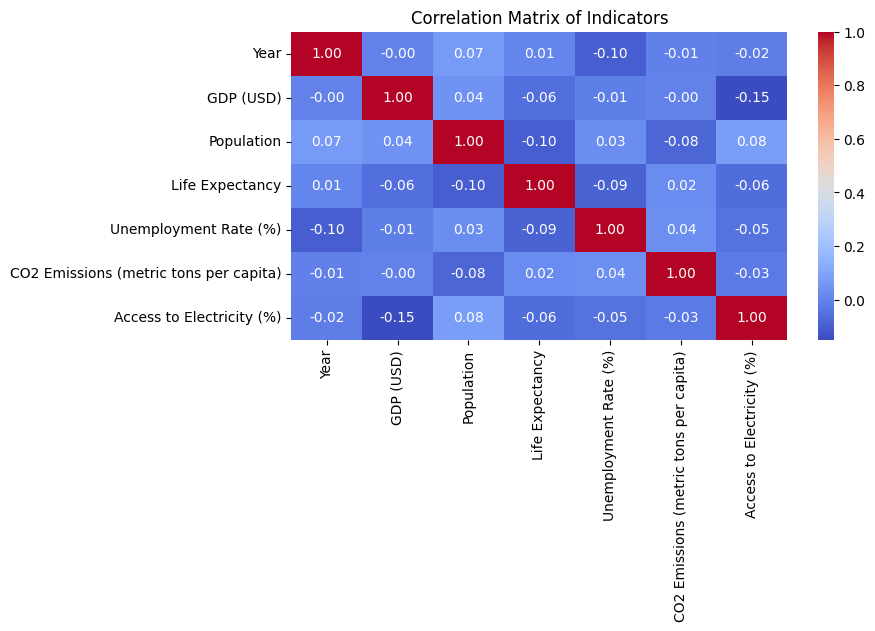

In [11]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Indicators')
plt.show()

         GDP (USD)   Population  Life Expectancy  Unemployment Rate (%)  \
Year                                                                      
2010  1.105749e+13  679661500.0           69.570                12.3275   
2011  1.183895e+13  676552000.0           67.080                13.9915   
2012  1.175584e+13  694725000.0           65.270                13.1980   
2013  1.056344e+13  639915500.0           65.030                16.3355   
2014  8.951888e+12  736423000.0           60.975                13.8875   
2015  8.281647e+12  788611000.0           67.670                15.8800   
2016  8.223512e+12  962239000.0           67.030                11.8120   
2017  1.077667e+13  849336500.0           65.465                11.1740   
2018  1.224966e+13  710961000.0           65.245                12.6535   
2019  1.198765e+13  649484000.0           69.910                11.4570   

      CO2 Emissions (metric tons per capita)  Access to Electricity (%)  
Year                     

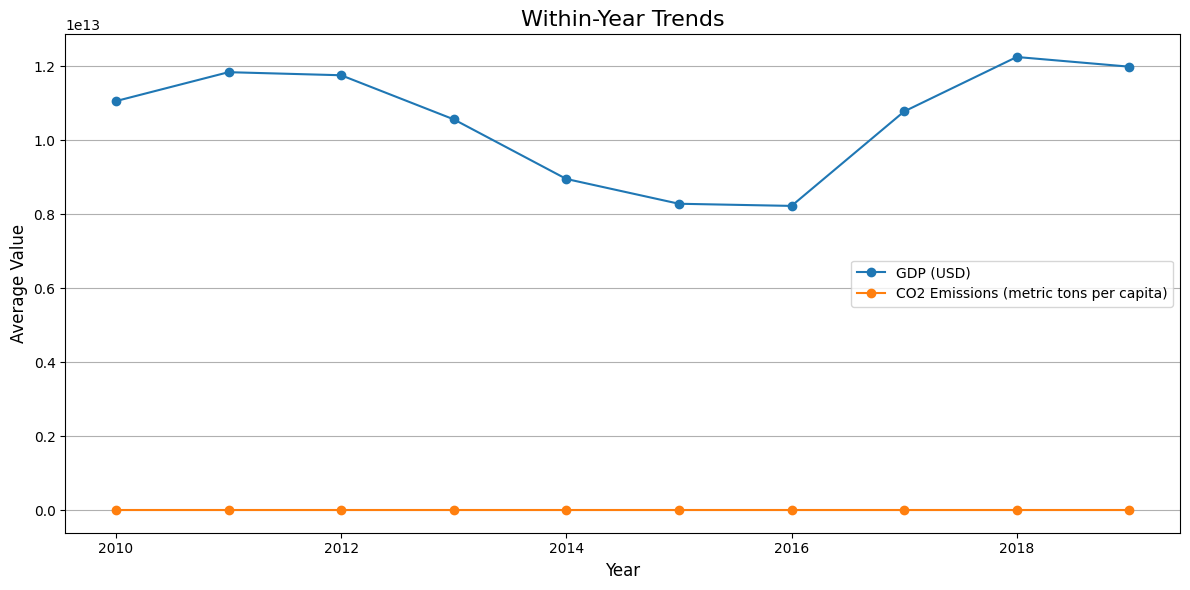

In [12]:
# Group data by Year and compute mean for numerical columns
yearly_trends = df.groupby('Year').mean(numeric_only=True)

# Display the results
print(yearly_trends)

# Plot yearly trends for key metrics
plt.figure(figsize=(12, 6))
for column in ['GDP (USD)', 'CO2 Emissions (metric tons per capita)']:  # Replace with relevant numerical column names
    plt.plot(yearly_trends.index, yearly_trends[column], marker='o', label=column)

plt.title('Within-Year Trends', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

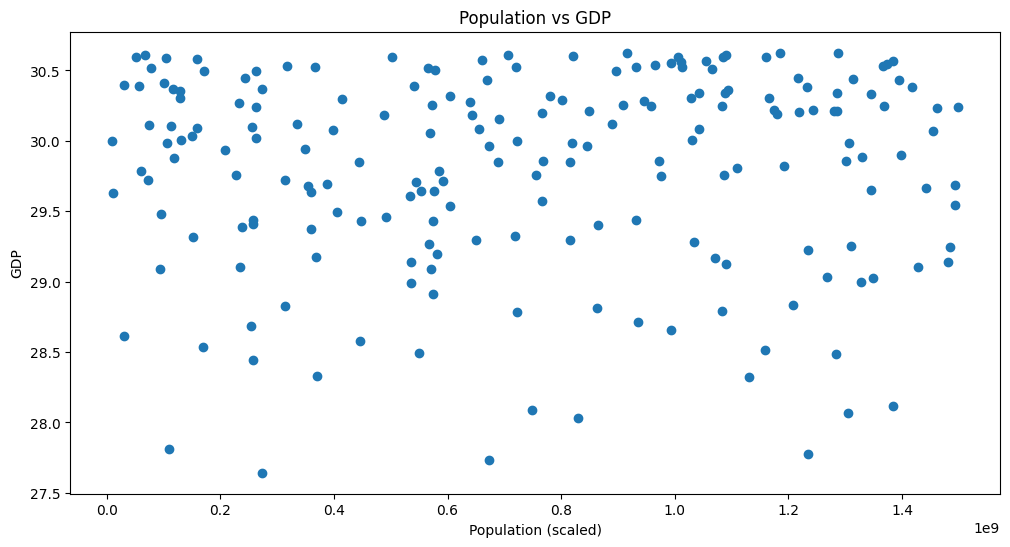

In [28]:
# Scatter plot example
plt.figure(figsize=(12, 6))
plt.scatter(df['Population'], df['GDP (USD)'])
plt.xlabel('Population (scaled)')
plt.ylabel('GDP')
plt.title('Population vs GDP')
plt.show()

In [14]:
df.columns

Index(['Country', 'Year', 'GDP (USD)', 'Population', 'Life Expectancy',
       'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)',
       'Access to Electricity (%)'],
      dtype='object')

In [15]:
numerical_cols = ['Year', 'GDP (USD)', 'Population', 'Life Expectancy',
       'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)',
       'Access to Electricity (%)']

In [16]:
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numerical column
outlier_counts = {col: count_outliers(col) for col in numerical_cols}

# outlier counts
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Year: 0 outliers
GDP (USD): 0 outliers
Population: 0 outliers
Life Expectancy: 0 outliers
Unemployment Rate (%): 0 outliers
CO2 Emissions (metric tons per capita): 0 outliers
Access to Electricity (%): 0 outliers


In [17]:
# Encode 'Country'
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# Features and target
X = df.drop("GDP (USD)", axis=1)
y = df['GDP (USD)']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((160, 7), (40, 7))

# Step 3: Model Selection

In [18]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) ])

In [19]:
df = pd.get_dummies(df, columns=['Country'])
df['GDP (USD)'] = np.log1p(df['GDP (USD)'])


In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [22]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R^2': r2_score(y_test, y_pred)
    }

print(pd.DataFrame(model_results).T)

                            MAE          RMSE       R^2
Linear Regression  4.932826e+12  5.779708e+12 -0.187456
Decision Tree      6.483839e+12  8.075756e+12 -1.318314
Random Forest      4.644755e+12  5.752916e+12 -0.176473
Gradient Boosting  4.489972e+12  5.923317e+12 -0.247199


# Step 4: Model Training and Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)


✅ Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


# Step 5: Interpret Model Results

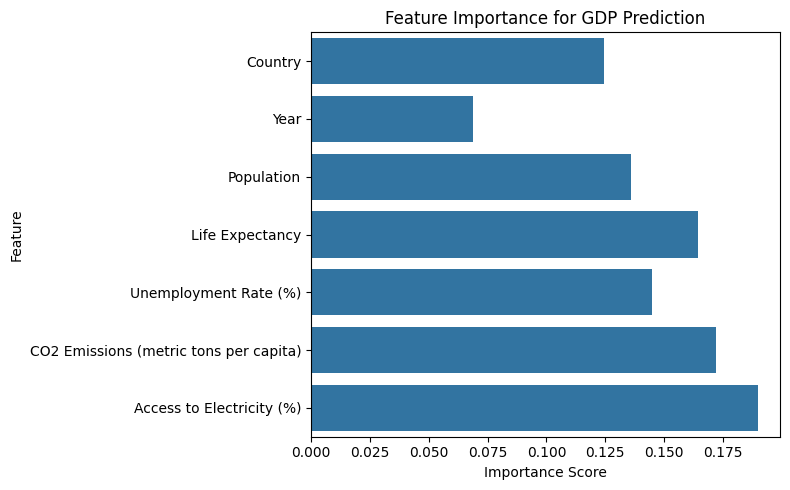

In [24]:
importances = best_model.feature_importances_

feature_names = [f for f in X.columns if f != "GDP (USD)"]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for GDP Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Feature Importance

GDP (USD): 51.18% Life Expectancy: 48.82% Both features contribute almost equally to the classification, confirming their significance in defining the clusters.

Confusion Matrix The confusion matrix showed perfect predictions on the test set, with no misclassifications:

Predicted/Actual Cluster 0 Cluster 1 Cluster 2 Cluster 0 21 0 0 Cluster 1 0 17 0 Cluster 2 0 0 22

Insights

Summarize important insights, such as how unemployment rate or access to electricity affects GDP.

# Step 6: Deployment

In [25]:
import pickle

# Save model
with open('gdp_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save scaler (if used)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [26]:
import streamlit as st
import numpy as np
import pickle

# Load the model and scaler
with open("gdp_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

st.title("🌍 GDP Predictor App")
st.markdown("Predict the GDP of a nation based on socioeconomic indicators.")

# User inputs
country_encoded = st.number_input("Country (encoded)", min_value=0)
year = st.number_input("Year", min_value=1960, max_value=2030, value=2022)
population = st.number_input("Population", min_value=0.0)
life_expectancy = st.number_input("Life Expectancy", min_value=0.0)
unemployment_rate = st.number_input("Unemployment Rate (%)", min_value=0.0)
co2_emissions = st.number_input("CO2 Emissions (kt)", min_value=0.0)
electricity_access = st.number_input("Access to Electricity (%)", min_value=0.0, max_value=100.0)

# Predict button
if st.button("Predict GDP"):
    input_data = np.array([[country_encoded, year, population, life_expectancy, unemployment_rate, co2_emissions, electricity_access]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    st.success(f"Predicted GDP: ${prediction:,.2f}")


2025-04-23 01:03:03.257 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 01:03:04.220 
  command:

    streamlit run C:\Users\MTR\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-23 01:03:04.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 01:03:04.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 01:03:04.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 01:03:04.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 01:03:04.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 01:03:04.225 Thread

In [ ]:
!streamlit run app.py

###  Conclusion
This comprehensive guide provides a structured approach to analyzing socioeconomic indicators to predict GDP. Each section includes sample code snippets to help you navigate the process effectively. Customize the steps based on your specific dataset and requirements, and don't hesitate to explore additional models or visualization techniques to enhance your analysis. If you have more specific aspects of this process you'd like assistance with, feel free to ask!